**Uso de uma Rede Neural Recorrente, para prever investimentos na bolsa de valores**

A base de dados representa investimentos nas ações da Petrobas na bolsa de valores, com o histórico do ano de 2013 ao ano de 2018 e o valor da alta da bolsa.

Você pode encontrar a base de dados, em:

https://br.financas.yahoo.com/

Importações iniciais

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Using TensorFlow backend.


Carregando da base de dados de treinamento

In [2]:
dataFrame = pd.read_csv('petr4_treinamento.csv')

A base de treino é composta pelas seguintes features:

* Date - Referente à data de abertura da ação;

* Open - Referente ao valor na abertura da ação;

* High - Referente ao valor máximo da ação;

* Low - Referente ao valor mínimo da ação;

* Close - Referente ao valor que a ação foi fechada;

* Adj Close - Referente ao valor real previsto pela ação;

* Volume - Total de investimentos

In [3]:
dataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
5,2013-01-09,19.639999,19.870001,19.459999,19.680000,18.077084,24361100.0
6,2013-01-10,19.770000,20.049999,19.540001,19.830000,18.214869,17526200.0
7,2013-01-11,19.850000,20.040001,19.700001,19.879999,18.260794,18223600.0
8,2013-01-14,20.010000,20.240000,19.690001,19.719999,18.113827,28302400.0
9,2013-01-15,20.010000,20.240000,19.690001,19.820000,18.205681,29633900.0


**Pré-processamento dos dados**

Em relação ao valores NaN, podemos realizar três ações:

* Exclução desses valores
* Substituição por 0
* Substituir pela média de cada coluna

In [4]:
dataFrame.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

Visto que a quantidade de valores do tipo NaN é relativamente baixa em relação aos 1245 dados do data set, podemos optar por apagar esses registros.

In [5]:
dataFrame = dataFrame.dropna()

In [94]:
dataFrame.shape

(1242, 7)

Dessa forma, podemos verificar se a função dropna(), conseguiu apagar estes valores nulos:

In [6]:
dataFrame.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Nesse cenário, faremos a previsão dos valores das ações com a utilização de múltiplos previsores. Com isso, usaremos todos os atributos da base de dados.

In [7]:
base_treinamento = dataFrame.iloc[:,1:2].values

In [9]:
base_valor_maximo = dataFrame.iloc[:,2:3].values

In [10]:
base_treinamento.shape

(1242, 1)

Nosso modelo trabalha com valores reais, podemos dizer assim. Dessa forma, podemos encontrar valores muito altos, que podem influenciar no treinamento. Para resolver essa problemática, podemos escolher duas opções:

* Normalização dos dados

* Padronização dos dados

Ambas as técnicas trabalham com o um único objetivo: deixar os dados na mesma grandeza. Para isso, veremos como cada uma trabalha, de forma individual:

**Normalização**

![Min-Max fórmula](https://miro.medium.com/max/202/1*9N7QdpE_CfvkTyirk7_oWw.png)

**Padronização**

<img src="https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2020/04/04155631/1426878678.png " alt="drawing" width="150"/>

Neste modelo, vamos utilizar a técnica de **Normalização**, visto a tratar os outliers nos nossos dados.

In [11]:
from sklearn.preprocessing import MinMaxScaler

Para normalizar esse dados, vamos utilizar a função MinMaxScaler(), que irá transformar os dados em uma escala de 0 e 1.

In [12]:
normalizador = MinMaxScaler(feature_range = [0,1])

In [14]:
base_treinamento_normalizer = normalizador.fit_transform(base_treinamento)

In [16]:
base_valor_maximo_normalizer = normalizador.fit_transform(base_valor_maximo)

In [17]:
base_treinamento_normalizer

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [18]:
base_valor_maximo_normalizer

array([[0.77266112],
       [0.78187106],
       [0.79253519],
       ...,
       [0.57537562],
       [0.57489089],
       [0.57343674]])

**Estrutura da base para previsão temporal I**

Quando trabalha-se com dados temporais é preciso definir um intervalo de tempo entre os dados e o alvo. Neste caso, podemos pegar um registro que tenha registros anteriores. 

Exemplo: 

| Dia da semana | Dia | Preço |
|---------------|-----|-------|
| Quinta-feira  | 03  | 19,99 |
| Sexta-feira   | 04  | 19,80 |
| Segunda-feira | 07  | 20,33 |
| Terça-feira   | 08  | 20,48 |
| Quarta-feira  | 09  | 20,11 |

Para prever o preço da Quarta-feira, dia 09, precisamos pegar os valores das 4 datas anteriores:

| **Previsores** |   **Preço real**|
|---------------|-----|
| 19,99 19,80 20,33 20,48 20,11  | 20,11  |


**Estrutura da base para previsão temporal II**

* Prever o preço real através do 90 valores anteriores

In [19]:
previsores = []
preco_abertura = []
preco_alta = []

for i in range(90, 1242):
    previsores.append(base_treinamento_normalizer[i-90:i, 0])
    preco_abertura.append(base_treinamento_normalizer[i, 0])
    preco_alta.append(base_valor_maximo_normalizer[i, 0])

In [21]:
previsores, preco_abertura, preco_alta = np.array(previsores), np.array(preco_abertura),np.array(preco_alta)

In [24]:
previsores.shape, preco_abertura.shape, preco_alta.shape

((1152, 90), (1152,), (1152,))

In [25]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

Como temos dois vetores previsores de saída, precisamos juntar os dois em apenas um vetor, para que estar no formato dos parâmetros da nossa rede.

In [27]:
preco_real = np.column_stack((preco_abertura, preco_alta))

In [28]:
preco_real

array([[0.76114341, 0.76490543],
       [0.76114341, 0.7746001 ],
       [0.77470935, 0.78090155],
       ...,
       [0.57122093, 0.57537562],
       [0.57655039, 0.57489089],
       [0.57655039, 0.57343674]])

Com a utilização da biblioteca Keras, nosso vetor de entradas precisa manter uma dimensão 3D com o formato:

                (batch_size, timesteps, input_dim)
Sendo:

* Batch_size - refere-se ao número de exemplos de treinamento usados em uma intereção

* Timesteps - refere-se a descrição da forma dos dados

* Input_dim - refere-se ao número de entradas

**Estrutura da Rede Neural Recorrente**

In [33]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1],1)))
regressor.add(Dropout(0.3))

In [34]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [35]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [36]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

In [37]:
regressor.add(Dense(units = 2,activation = 'sigmoid'))

In [38]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_squared_error'])

Para termos acesso às estatísticas e detalhes matemáticos do modelo, usaremos uma classe do Keras, chamada callbacks.

* A função **EarlyStopping** para o treinamento, quando alguma métrica não apresenta bons resultados durante o treino

* A função **ReduceLROnPlateau** reduz a taxa de aprendizagem, quando alguma métrica não está funcionando bem

* A função **ModelCheckpoint** salva os pesos após cada epóca

In [39]:
es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10, verbose = 1)

rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 5, verbose = 1)

mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss', save_best_only = True, verbose = 1)

In [40]:
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32,
             callbacks = [es, rlr, mcp])

Epoch 1/100
1152/1152 [==============================] - 10s 8ms/step - loss: 0.0177 - mean_squared_error: 0.0177

Epoch 00001: loss improved from inf to 0.01770, saving model to pesos.h5
Epoch 2/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0069 - mean_squared_error: 0.0069

Epoch 00002: loss improved from 0.01770 to 0.00687, saving model to pesos.h5
Epoch 3/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0066 - mean_squared_error: 0.0066

Epoch 00003: loss improved from 0.00687 to 0.00665, saving model to pesos.h5
Epoch 4/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0051 - mean_squared_error: 0.0051

Epoch 00004: loss improved from 0.00665 to 0.00510, saving model to pesos.h5
Epoch 5/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0045 - mean_squared_error: 0.0045

Epoch 00005: loss improved from 0.00510 to 0.00455, saving model to pesos.h5
Epoch 6/100
1152/1152 [=========================

1152/1152 [==============================] - 7s 6ms/step - loss: 0.0015 - mean_squared_error: 0.0015

Epoch 00044: loss did not improve from 0.00141
Epoch 45/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0014 - mean_squared_error: 0.0014

Epoch 00045: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.

Epoch 00045: loss did not improve from 0.00141
Epoch 46/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015

Epoch 00046: loss did not improve from 0.00141
Epoch 47/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015

Epoch 00047: loss did not improve from 0.00141
Epoch 48/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015

Epoch 00048: loss did not improve from 0.00141
Epoch 49/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015

Epoch 0

**Previsão de preços de ações**

Carregando da base de dados

In [41]:
base_teste = pd.read_csv('petr4_teste.csv')

In [43]:
base_teste.shape

(22, 7)

Como estamos fazendo o uso apenas da feature **Open**, vamos extrai-la:

In [44]:
preco_real_open = base_teste.iloc[:,1:2].values

In [45]:
preco_real_alta = base_teste.iloc[:,2:3].values

In [47]:
base_completa = pd.concat((dataFrame['Open'], base_teste['Open']), axis = 0)

In [48]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

Em seguida, colocaremos nossos dados na mesma escala.

In [52]:
entradas = entradas.reshape(-1,1)

In [53]:
entradas = normalizador.transform(entradas)
entradas.shape

(112, 1)

Precisamos colocar nossos dados de teste em uma lista. Dessa forma, iremos preencher nosso vetor X_teste.

In [54]:
X_teste = []
for i in range(90,112):
    X_teste.append(entradas[i-90:i, 0:6])

X_teste = np.array(X_teste)

In [55]:
X_teste.shape

(22, 90, 1)

Agora, iremos realizar nossas previções:

In [56]:
previsoes = regressor.predict(X_teste)

In [57]:
previsoes

array([[0.57007504, 0.5781905 ],
       [0.5733316 , 0.58159286],
       [0.5768242 , 0.58516526],
       [0.5828314 , 0.5912288 ],
       [0.5909964 , 0.5994748 ],
       [0.599182  , 0.6077787 ],
       [0.6064045 , 0.61513793],
       [0.6115416 , 0.62039447],
       [0.61391586, 0.6228385 ],
       [0.6145319 , 0.62345994],
       [0.61607   , 0.6249586 ],
       [0.62010854, 0.62895846],
       [0.62878203, 0.63766277],
       [0.6432828 , 0.65233105],
       [0.6606091 , 0.6699709 ],
       [0.675345  , 0.68509406],
       [0.68421763, 0.6943323 ],
       [0.68702704, 0.69740903],
       [0.69010866, 0.7006555 ],
       [0.6992042 , 0.7098658 ],
       [0.71448606, 0.7253047 ],
       [0.73135155, 0.7424119 ]], dtype=float32)

Para visualizarmos as previsoes, iremos fazer um processo inverso à normalização. Dessa forma, iremos visualizar os preços em escalas reais ao início. 

In [59]:
previsoes = normalizador.inverse_transform(previsoes)

Para visualizarmos o quanto as previsoes puderam se aproximar dos valores reais, podemos fazer um gráfico com ambos os vetores. Para isso, vamos utilizar a biblioteca **matplotlib**, para plotar esses valores.

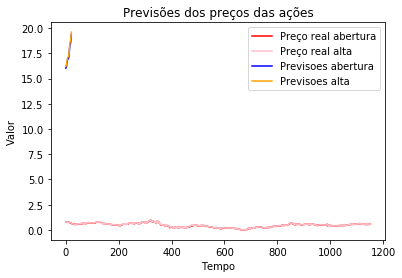

In [64]:
plt.plot(preco_abertura, color = 'red', label = 'Preço real abertura')
plt.plot(preco_alta, color = 'pink', label = 'Preço real alta')

plt.plot(previsoes[:,0], color = 'blue', label = 'Previsoes abertura')
plt.plot(previsoes[:,1], color = 'orange', label = 'Previsoes alta')
         
plt.title('Previsões dos preços das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

**Referências**

https://www.udemy.com/course/deep-learning-com-python-az-curso-completo/learn/lecture/10897310#questions

https://translate.googleusercontent.com/translate_c?depth=1&hl=pt-BR&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://stackoverflow.com/questions/38714959/understanding-keras-lstms&usg=ALkJrhgwRgxszeum-5XuG2HTiE0KM75Wog

https://www.google.com/search?q=LSTM&client=ubuntu&hs=DAN&channel=fs&sxsrf=ALeKk02TzfQeiFwQ3Hw3VX9kUWN9kBiJ6g:1592424774740&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiBip7I1InqAhU0D7kGHfcuDHsQ_AUoAXoECA8QAw

https://keras.io/api/callbacks/